<IPython.core.display.Javascript object>


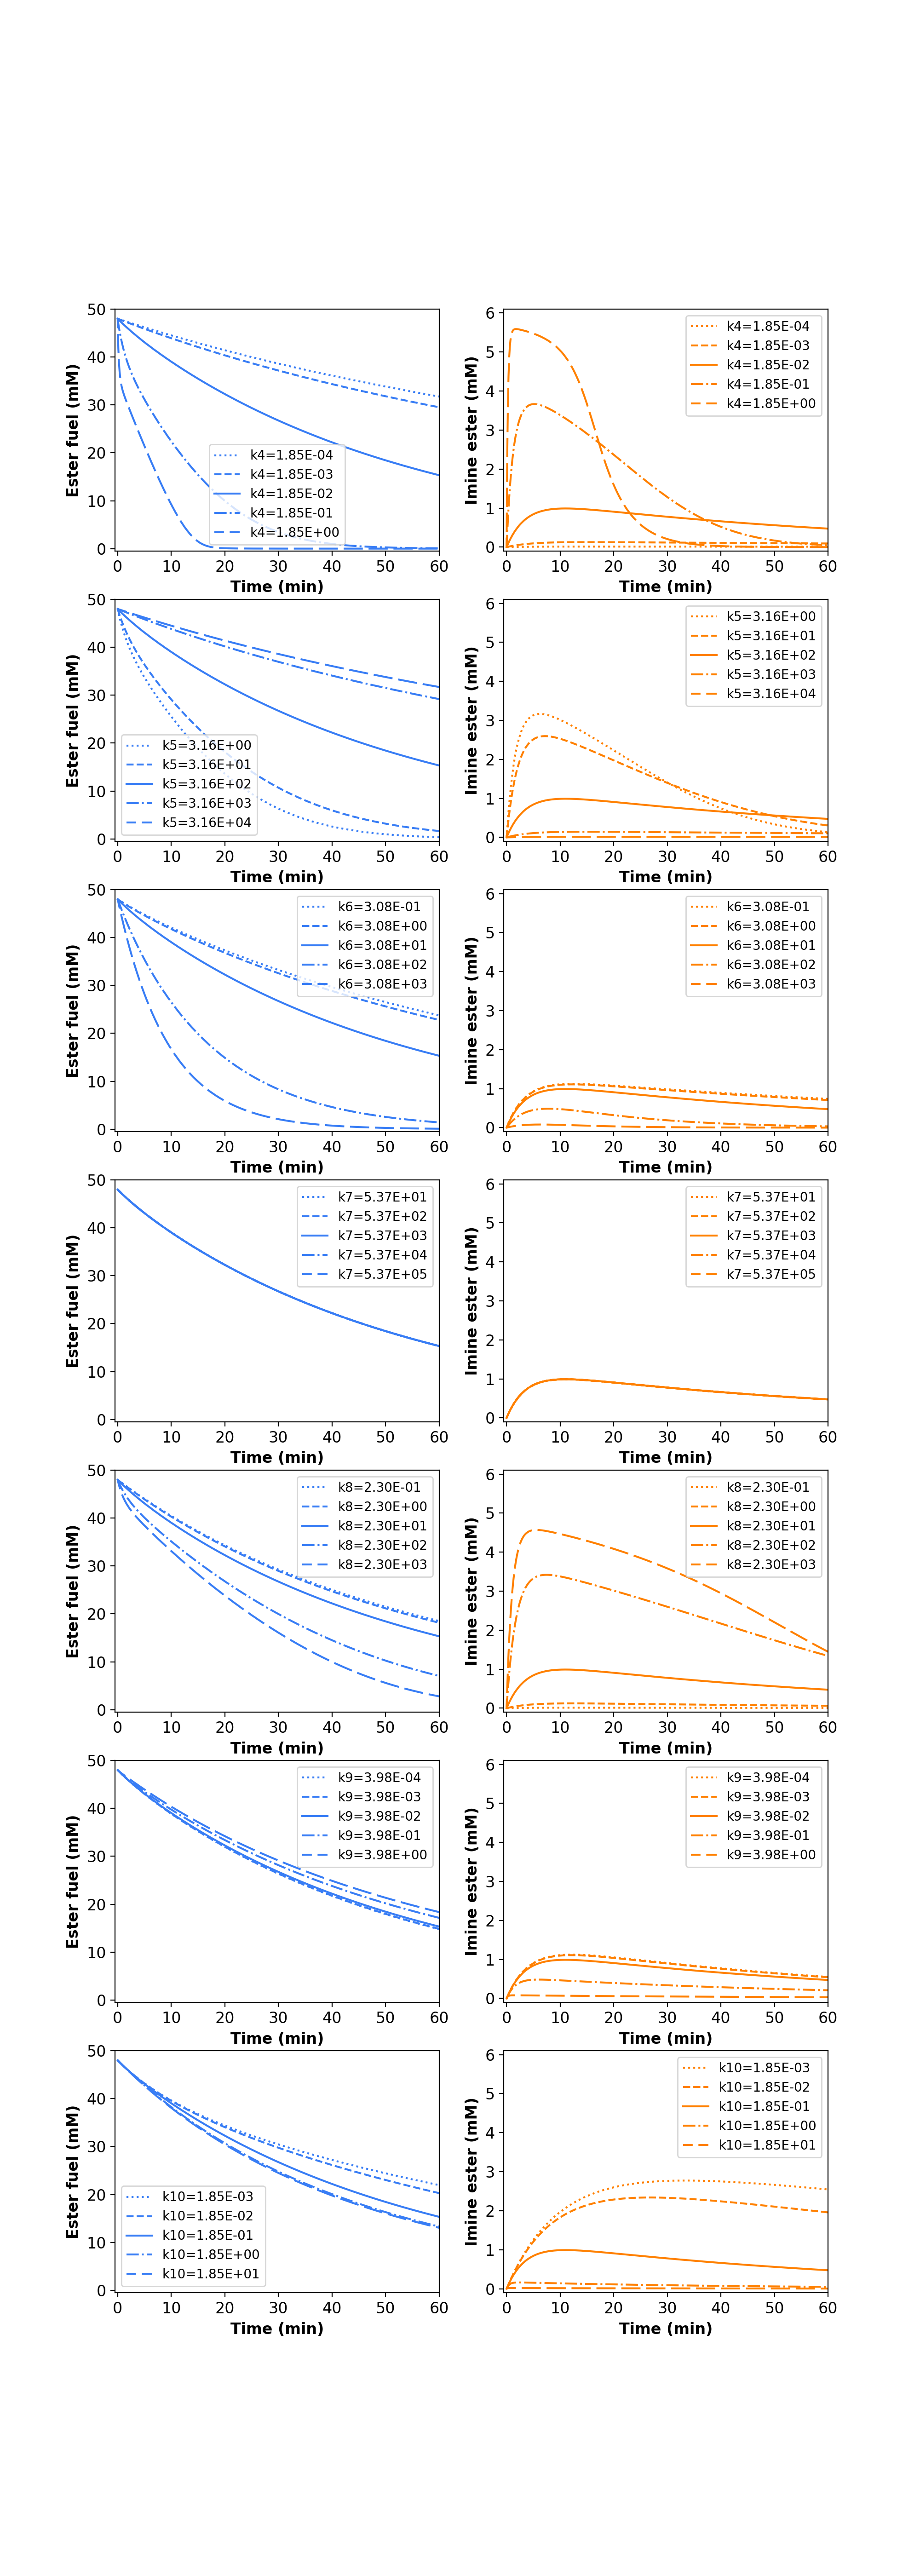

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib notebook

"""
Code for preparing plot outputs for the simulation with variations in rate constants. 

As the default values of the rate constants, the values in Table S7 (pH 7.00) were used.

ODE integration is done by varying one rate constant for each time: k[i]/m**2, k[i]/m, k[i], k[i]*m and k[i]*m**2 (i: integer between 4-10, m: multiplier), while other rate constants are kept constant. 
"""

plt.ion()
fig = plt.figure(figsize=(10, 28))
plt.clf()

#Default values of the rate constants and the multiplier
k = np.array([0, 0.0033, 0.000044, 0.000004, 0.0185, 316.0, 30.8, 5370.0, 23.0, 0.0398, 0.185])
m = 10

#Initial concentrations
fuel0 = 48.0; fuel_dimer0 = 0.0; phenol_waste0 = 0.0; alanine_waste0 = 0.0; waste_dimer0 = 0.0
aldehyde0 = 6.0; i10 = 0.0; i20 = 0.0; imine_ester0 = 0.0
    
#Time points
t = np.linspace(0,60,501)

#List of line styles
ls = ['dotted', 'dashed', 'solid', 'dashdot', (5,(10,3))]

#for loop for changing the varied rate constant
for i in range(4,11,1):
    #Add axes for the new i
    ax1 = fig.add_subplot(7, 2, (i-4)*2+1)
    ax2 = fig.add_subplot(7, 2, (i-4)*2+2)

    #Set k[i] to the first value in variation
    k[i] /= m**2

    #for loop for preparing plots with a varied rate constant
    for j in range(5):

        #Calculate concentrations by numerical integration
        def rhs(C,t):
            fuel, fuel_dimer, phenol_waste, alanine_waste, waste_dimer, aldehyde, i1, i2, imine_ester = C
            return [-k[1]*fuel-2*k[2]*fuel**2-k[4]*fuel*aldehyde+k[5]*i1,
                   k[2]*fuel**2-k[3]*fuel_dimer,
                   k[1]*fuel+k[2]*fuel**2+k[3]*fuel_dimer+k[6]*i1+k[10]*imine_ester,
                   k[1]*fuel+k[7]*i2+k[10]*imine_ester,
                   k[3]*fuel_dimer,
                   -k[4]*fuel*aldehyde+k[5]*i1+k[7]*i2+k[10]*imine_ester,
                   k[4]*fuel*aldehyde-k[5]*i1-k[6]*i1-k[8]*i1+k[9]*imine_ester,
                   k[6]*i1-k[7]*i2,
                   k[8]*i1-k[9]*imine_ester-k[10]*imine_ester]

        Conc = odeint(rhs, [fuel0, fuel_dimer0, phenol_waste0, alanine_waste0, waste_dimer0, aldehyde0, i10, i20, imine_ester0], t)
        fuel_int, fuel_dimer_int, phenol_waste_int, alanine_waste_int, waste_dimer_int, aldehyde_int, i1_int, i2_int, imine_ester_int \
        = Conc[:,0], Conc[:,1], Conc[:,2], Conc[:,3], Conc[:,4], Conc[:,5], Conc[:,6], Conc[:,7], Conc[:,8]

        #Plot results
        ax1.plot(t, fuel_int, label='k%d=%-8.2E' % (i,k[i]), color=(0.22, 0.49, 0.96), linestyle=ls[j])
        ax2.plot(t, imine_ester_int, label='k%d=%-8.2E' % (i,k[i]), color=(1, 0.5, 0), linestyle=ls[j])

        #Set k[i] to the next value
        k[i] *= m
        
    #Restore the varied rate constant to the default value
    k[i] /= m**3
    
    ax1.set_xlabel('Time (min)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Ester fuel (mM)', fontsize=12, fontweight='bold')
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.set_xlim(-0.5, 60.0)
    ax1.set_ylim(-0.5, 50.0)
    ax1.legend(loc='best')

    ax2.set_xlabel('Time (min)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Imine ester (mM)', fontsize=12, fontweight='bold')
    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.set_xlim(-0.5, 60.0)
    ax2.set_ylim(-0.1, 6.1)
    ax2.legend(loc='best')

plt.show()
fig.savefig('pH 7.00 rate constants variation.svg', dpi=300, transparent=True)